RMSE: 21.86
R² Score: 0.946


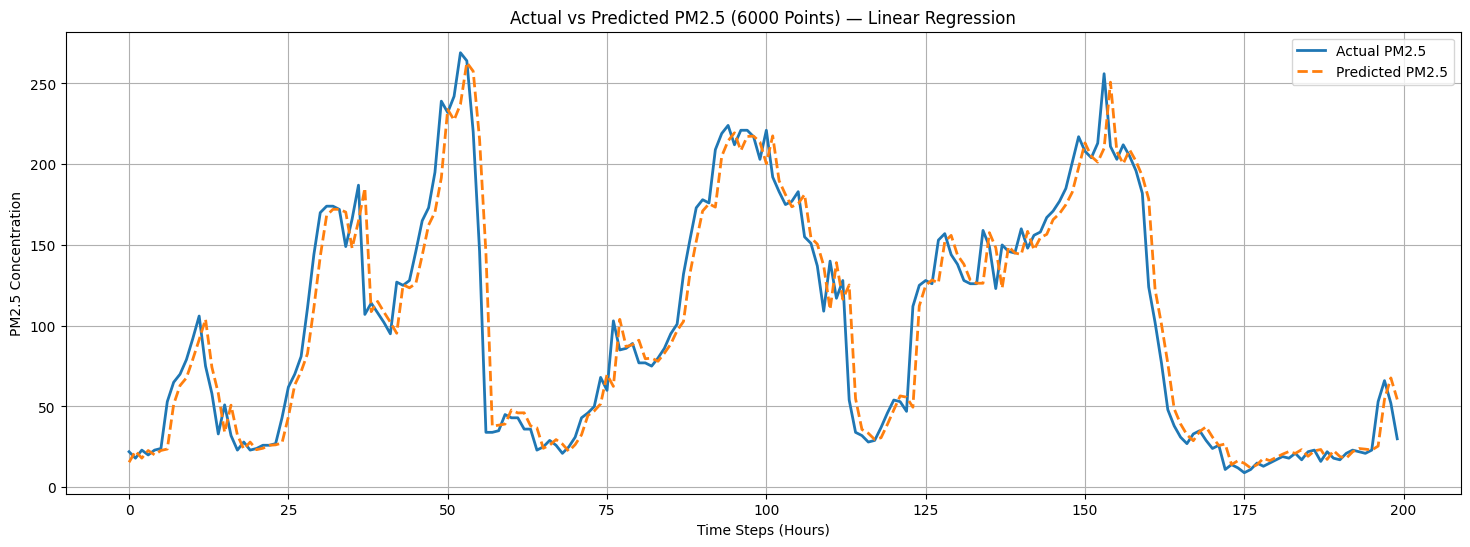

6000-point graph saved successfully.


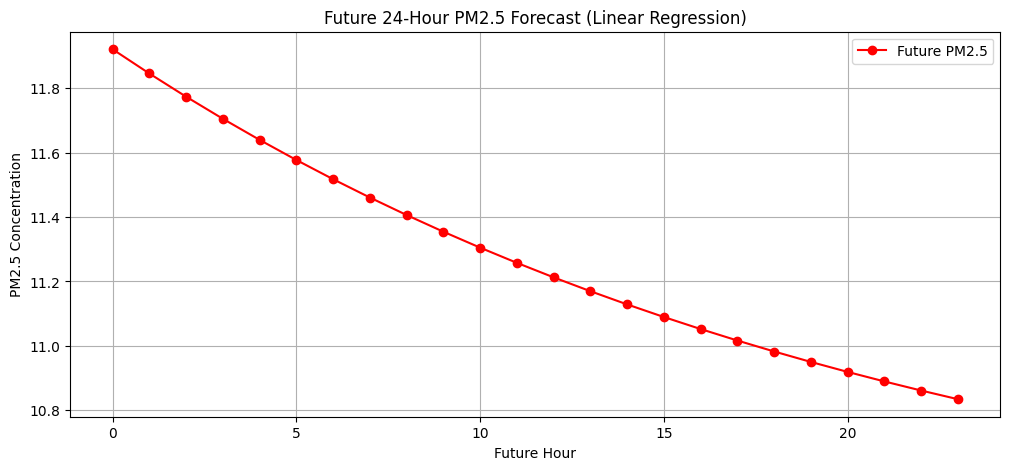

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import os

# -------------------------------------------------
# 1. LOAD DATA
# -------------------------------------------------
df = pd.read_csv(r"C:\Users\srust\Downloads\data.csv")
df = df.rename(columns={"pm2.5": "pm25"})
df = df.ffill().bfill()

# -------------------------------------------------
# 2. SELECT FEATURES
# -------------------------------------------------
features = ["pm25", "DEWP", "TEMP", "PRES", "Iws", "Is", "Ir"]
data = df[features]

# -------------------------------------------------
# 3. SCALE DATA
# -------------------------------------------------
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

# -------------------------------------------------
# 4. CREATE NEXT-HOUR DATASET
# -------------------------------------------------
X = scaled[:-1]          # current hour data
y = scaled[1:, 0]        # next-hour PM2.5

# -------------------------------------------------
# 5. TRAIN-TEST SPLIT
# -------------------------------------------------
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# -------------------------------------------------
# 6. TRAIN LINEAR REGRESSION
# -------------------------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# -------------------------------------------------
# 7. PREDICTION (ONE-STEP AHEAD)
# -------------------------------------------------
y_pred = model.predict(X_test)

# -------------------------------------------------
# 8. INVERSE SCALING
# -------------------------------------------------
def inverse_pm25(vals):
    dummy = np.zeros((len(vals), scaled.shape[1]))
    dummy[:, 0] = vals
    return scaler.inverse_transform(dummy)[:, 0]

y_test_inv = inverse_pm25(y_test)
y_pred_inv = inverse_pm25(y_pred)

# -------------------------------------------------
# 9. METRICS
# -------------------------------------------------
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

# -------------------------------------------------
# 10. PLOT 6000 POINTS
# -------------------------------------------------
POINTS = 200

output_dir = r"C:\Users\srust\OneDrive\Desktop\LINEAR_REGRESSION_OUTPUT"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(18,6))
plt.plot(y_test_inv[:POINTS], label="Actual PM2.5", linewidth=2)
plt.plot(y_pred_inv[:POINTS], label="Predicted PM2.5", linewidth=2, linestyle="--")

plt.title("Actual vs Predicted PM2.5 (6000 Points) — Linear Regression")
plt.xlabel("Time Steps (Hours)")
plt.ylabel("PM2.5 Concentration")
plt.legend()
plt.grid(True)

plt.savefig(rf"{output_dir}\actual_vs_predicted_6000_lr.png",
            dpi=300, bbox_inches="tight")
plt.show()

print("6000-point graph saved successfully.")
# ---------------- FUTURE 24-HOUR PREDICTION ----------------

future_input = scaled[-1].copy()
future_predictions_scaled = []

for _ in range(PRED_HOURS):
    pred = model.predict(future_input.reshape(1, -1))[0]
    future_predictions_scaled.append(pred)
    future_input[0] = pred

future_pm25 = inverse_pm25(np.array(future_predictions_scaled))

plt.figure(figsize=(12,5))
plt.plot(future_pm25, color="red", marker='o', label="Future PM2.5")
plt.title("Future 24-Hour PM2.5 Forecast (Linear Regression)")
plt.xlabel("Future Hour")
plt.ylabel("PM2.5 Concentration")
plt.legend()
plt.grid(True)
plt.savefig(rf"{output_dir}\pm25_24hr_future_lr.png", dpi=300, bbox_inches="tight")
plt.show()








